In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("train_v1.csv", index_col="Datetime")

In [4]:
df.columns

Index(['Category_1', 'Price', 'Number_Of_Sales', 'DayOfMonth', 'DayCount',
       'cat_3_0', 'cat_3_1', 'cat_2_1.0', 'cat_2_2.0', 'cat_2_3.0',
       'cat_2_4.0', 'cat_2_5.0', 'cat_2_other', 'week_0', 'week_1', 'week_2',
       'week_3', 'week_4', 'week_5', 'week_6', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'is_weekend'],
      dtype='object')

In [5]:
X = df.drop(['Price', 'Number_Of_Sales', 'DayOfMonth'], axis=1)

In [6]:
X.columns

Index(['Category_1', 'DayCount', 'cat_3_0', 'cat_3_1', 'cat_2_1.0',
       'cat_2_2.0', 'cat_2_3.0', 'cat_2_4.0', 'cat_2_5.0', 'cat_2_other',
       'week_0', 'week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'is_weekend'],
      dtype='object')

In [7]:
X.dtypes

Category_1     int64
DayCount       int64
cat_3_0        int64
cat_3_1        int64
cat_2_1.0      int64
cat_2_2.0      int64
cat_2_3.0      int64
cat_2_4.0      int64
cat_2_5.0      int64
cat_2_other    int64
week_0         int64
week_1         int64
week_2         int64
week_3         int64
week_4         int64
week_5         int64
week_6         int64
month_1        int64
month_2        int64
month_3        int64
month_4        int64
month_5        int64
month_6        int64
month_7        int64
month_8        int64
month_9        int64
month_10       int64
month_11       int64
month_12       int64
is_weekend     int64
dtype: object

In [8]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [9]:
# X["Category_1"], cat_1_lambda = boxcox(X["Category_1"]+1)

In [10]:
df["Number_Of_Sales"].describe()

count    624860.000000
mean        314.606854
std         313.098404
min           1.000000
25%          71.000000
50%         199.000000
75%         470.000000
max        1254.000000
Name: Number_Of_Sales, dtype: float64

In [11]:
y_sales = df["Number_Of_Sales"]
y_price = df["Price"]
# Y_sales = df["Number_Of_Sales"]
# Y_price = df["Price"]
# y_sales, sales_lamda = boxcox(df["Number_Of_Sales"])
# y_price, price_lamda = boxcox(df["Price"])

In [12]:
from sklearn.cross_validation import train_test_split 

/home/iamnewneo/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
from sklearn.metrics import mean_squared_error as mse

In [14]:
def rmse(act_y, pred_y):
    return np.sqrt(mse(act_y, pred_y))

In [15]:
X_train, X_test, y_sales_train, y_sales_test = train_test_split(X, y_sales)

In [16]:
# y_sales_train, sales_lamda = boxcox(Y_sales_train)

## Xgboost

In [17]:
from xgboost.sklearn import XGBRegressor

In [18]:
plain_xgbreg = XGBRegressor()

In [19]:
plain_xgbreg.fit(X_train, y_sales_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [21]:
y_sales_pred = plain_xgbreg.predict(X_test)
score = rmse(y_sales_test, y_sales_pred)
print(score)
# y_sales_pred = plain_xgbreg.predict(X_test)
# score = rmse(Y_sales_test, inv_boxcox(y_sales_pred, sales_lamda))
# print(score)

284.651195355


In [23]:
y_sales_test[:10].values, y_sales_pred[:10]

(array([   9,  112,   43,   64, 1031,   47,  618,   86,   87,  161]),
 array([ 175.35540771,  373.67202759,  215.4538269 ,  213.20645142,
         397.4949646 ,  324.47006226,  438.22579956,  377.99319458,
         143.50296021,  260.40060425], dtype=float32))

## Price

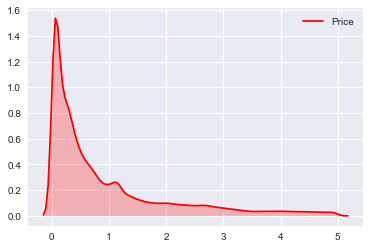

In [24]:
ax = sns.kdeplot(y_price, shade=True, color="r")

In [25]:
X_train, X_test, y_price_train, y_price_test = train_test_split(X, y_price)

In [26]:
price_plain_xgbreg = XGBRegressor()
price_plain_xgbreg.fit(X_train, y_price_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [27]:
y_price_pred = price_plain_xgbreg.predict(X_test)
score = rmse(y_price_test, y_price_pred)
print(score)

0.902803426951


## Initial Submission

In [31]:
test = pd.read_csv("test_v1.csv", index_col="Datetime")

In [33]:
test = test.drop(["Unnamed: 0"], axis=1)

In [34]:
test.columns

Index(['Item_ID', 'Category_1', 'ID', 'DayOfMonth', 'DayCount', 'cat_3_0',
       'cat_3_1', 'cat_2_1.0', 'cat_2_2.0', 'cat_2_3.0', 'cat_2_4.0',
       'cat_2_5.0', 'cat_2_other', 'week_0', 'week_1', 'week_2', 'week_3',
       'week_4', 'week_5', 'week_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'is_weekend'],
      dtype='object')

In [35]:
test = test.drop(["Item_ID", "DayOfMonth"], axis=1)

In [40]:
X.shape

(624860, 30)

In [41]:
test.shape

(266248, 25)

In [44]:
test["month_11"].shape

(266248,)

In [45]:
for i in range(1,7):
    test["month_"+str(i)] = np.zeros((test.shape[0]),int)

In [47]:
columns = test.columns.tolist()

In [60]:
X.columns

Index(['Category_1', 'DayCount', 'cat_3_0', 'cat_3_1', 'cat_2_1.0',
       'cat_2_2.0', 'cat_2_3.0', 'cat_2_4.0', 'cat_2_5.0', 'cat_2_other',
       'week_0', 'week_1', 'week_2', 'week_3', 'week_4', 'week_5', 'week_6',
       'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'is_weekend'],
      dtype='object')

In [61]:
new_cols = columns[:-13] + columns[-6:] + columns[-13:-6]

In [62]:
test = test[new_cols]

In [63]:
test.head()

,Category_1,ID,DayCount,cat_3_0,cat_3_1,cat_2_1.0,cat_2_2.0,cat_2_3.0,cat_2_4.0,cat_2_5.0,...,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,is_weekend
Datetime,,,,,,,,,,,,,,,,,,,,,
2016-07-01,235,30413_20160701,736146,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2016-07-02,235,30413_20160702,736147,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2016-07-03,235,30413_20160703,736148,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2016-07-04,235,30413_20160704,736149,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2016-07-05,235,30413_20160705,736150,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [66]:
sales_pred = plain_xgbreg.predict(test.drop(["ID"],axis=1))

In [67]:
price_pred = price_plain_xgbreg.predict(test.drop(["ID"],axis=1))

In [68]:
test["Number_Of_Sales"] = sales_pred
test["Price"] = price_pred

In [70]:
submission = test[["ID", "Number_Of_Sales", "Price"]]

In [73]:
submission.head()

,ID,Number_Of_Sales,Price
Datetime,,,
2016-07-01,30413_20160701,447.591919,0.791458
2016-07-02,30413_20160702,466.107147,0.791458
2016-07-03,30413_20160703,466.107147,0.791458
2016-07-04,30413_20160704,445.344543,0.791458
2016-07-05,30413_20160705,445.344543,0.791458


In [74]:
submission["Number_Of_Sales"] = submission["Number_Of_Sales"].astype(int)
submission["Price"] = submission["Price"].astype(int)

Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7f6b0e5ec048>>
Traceback (most recent call last):
  File "/home/iamnewneo/anaconda3/lib/python3.5/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


In [76]:
submission.to_csv("iamnewneo_submission.csv", index=False)

In [ ]:
import scipy.stats as st

In [ ]:
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

params = {  
    "n_estimators": st.randint(3, 40),
    "max_depth": st.randint(3, 40),
    "learning_rate": st.uniform(0.05, 0.4),
    "colsample_bytree": one_to_left,
    "subsample": one_to_left,
    "gamma": st.uniform(0, 10),
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
xgbreg = XGBRegressor()

In [ ]:
rs = RandomizedSearchCV(xgbreg, params, n_jobs=-1, scoring='mean_squared_error', cv=5)
rs.fit(X_train, y_sales_train) 

In [ ]:
# xgbreg.fit(X_train, y_sales_train)

In [ ]:
y_sales_pred = rs.predict(X_test)

In [ ]:
score = rmse(y_sales_test, y_sales_pred)

In [ ]:
score

In [ ]:
# params = {}
# params["objective"] = "reg:linear"
# params["eta"] = 0.02
# params["min_child_weight"] = 8
# params["subsample"] = 0.9
# params["colsample_bytree"] = 0.8
# params["silent"] = 1
# params["max_depth"] = 8
# params["seed"] = 

# plst = list(params.items())
# num_rounds = 500
# xgtrain = xgb.DMatrix(train_X, label=train_y)
# xgtest = xgb.DMatrix(test_X)
# model = xgb.train(plst, xgtrain, num_rounds)

In [ ]:
pred_test_y = model.predict(xgtest)